# ETUDE DU VIN

## Intro
Nous avons choisit de récupérer une base de données sur les vins du monde. Cette base contient de nombreuses informations telles que le nom du vin, la région d'où il vient, son prix, sa qualité, etc...
Un des objectifs du projet est de savoir si les meilleurs vins sont les plus chèrs. En effet, on peut se demander si le prix est bien fonction de sa qualité. Le prix des vins pourrait etre uniquement lié à la renommée de ceux-ci. 
On propose alors de faire une régression entre le prix et la qualité du vin. 

Cellule à lancer pour faire les importations nécessaires : 

In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



### I. Nettoyage des données 
Avant de commencer à analyser notre de base de données, on doit nettoyer son contenu. C'est à dire traiter les valeurs manquantes en les supprimant et retirer les doublons pour garantir une analyse fiable et des models pertients. 

Le code suivant permet de faire ceci : 

In [89]:
path='winemag-data-130k-v2.csv'
data=pd.read_csv(path)

# Extract X (price) and y (points)
x = data['price'].values
y = data['points'].values

print('Avant le nettoyage de donnees nous avons', len(x), 'elements')

# Remove any rows where price is NaN 
valid_indices = ~np.isnan(x) & ~np.isnan(y)
x = x[valid_indices]
y = y[valid_indices]

print('apres le nettoyage de donnees nous avons', len(x), 'elements')



Avant le nettoyage de donnees nous avons 129971 elements
apres le nettoyage de donnees nous avons 120975 elements


### II. Analyse exploratoire 
Cette partie sert à comprendre comment sont réparties nos données. Elle permet aussi de savoir si le pays est un facteur à prendre en compte pour déterminer la qualité du vin. Certains pays pourraient proposer des vins chèrs à cause de leur renommée. Enfin,  l'analyse exploratoire permet de vérifier qu'il existe bien un lien entre le prix du vin et sa qualité, avant qu'on lance des calculs pour faire une régression. 
- Loi suivit par les notes : 

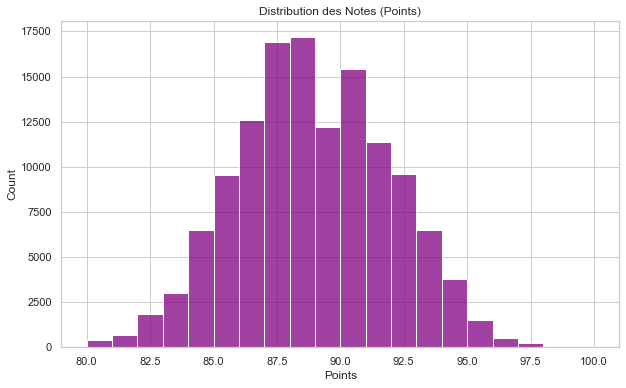

In [90]:
#code ia, à interpréter

# Configuration du style
sns.set_theme(style="whitegrid")
fichier = data
# 1. Distribution des points (Notes)
plt.figure(figsize=(10, 6))
sns.histplot(fichier['points'], bins=20,  color='purple')
plt.title('Distribution des Notes (Points)')
plt.xlabel('Points')
plt.show()

On observe que les notes sont réparties entre 86 et 96 (faible écart-type). On remarque que la majorité des vins a une note de 91. Notre jeu de données fournit donc uniquement des bons vins. On se demandera par la suite si il existe de grands écarts de prix pour des petites variations de notes.  

- Quels sont les pays avec les vins les plus chèrs : 

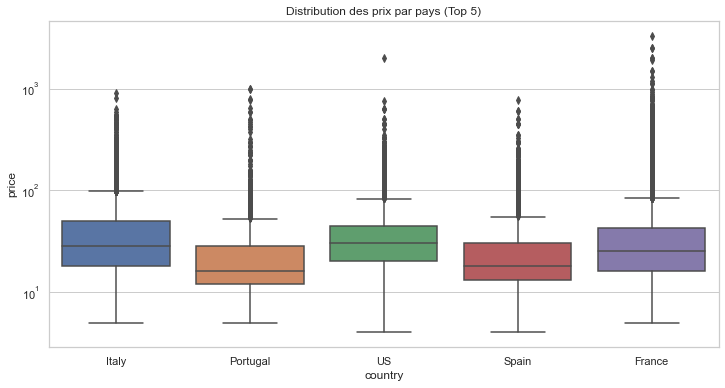

In [96]:

# On sélectionne les 5 pays les plus représentés pour que le graphique reste lisible
top_countries = fichier['country'].value_counts().head(5).index
fichier_top_countries = fichier[fichier['country'].isin(top_countries)]

# Boxplot : Prix par Pays
plt.figure(figsize=(12, 6))
# On limite l'axe Y à 200$ pour voir les boîtes, sinon les vins à 3000$ écrasent tout
sns.boxplot(x='country', y='price', data=fichier_top_countries)
plt.yscale('log')

plt.title('Distribution des prix par pays (Top 5)')
plt.show()

D'après le graphique, on remarque qu'on ne peut pas traiter tous les vins de la même manière. Le prix varie selon le pays. Par exemple, les vins espagnols sont en majorité plus chèrs que les vins portuguais. Le prix moyen d'une bouteille est de 75$ en Espagne tandis qu'il est de 25$ au Portugal.
( Nous allons donc nous concentrer sur les gros producteurs et probablement devoir transformer la variable prix (log) pour que notre modèle fonctionne.)

- Corrélation prix/qualité : 

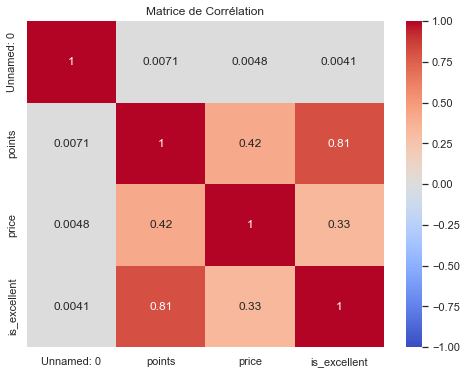

In [97]:
#code ia, à interpréter
# Calcul de la corrélation
# On ne garde que les colonnes numériques
numeric_df = fichier.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

# Affichage de la Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

On observe une corrélation modérée entre le prix du vin et sa qualité. On est à 0.53 donc assez loin de 1.

### III. Modélisation 1 : régression prix/qualité 

debug
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


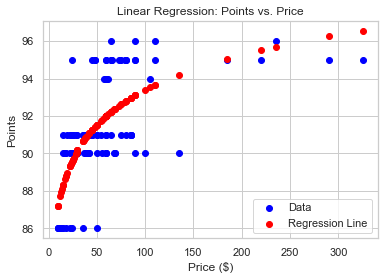

finished


In [98]:


# Load the data

path='data.csv'

print('debug')
df = pd.read_csv(path)

print(df.keys())

# Extract X (price) and y (points)
X = df['price'].values
y = df['points'].values

# Remove any rows where price is NaN 
valid_indices = ~np.isnan(X) & ~np.isnan(y)
x = X[valid_indices]
y = y[valid_indices]

log_x = np.log(x)
coefficients = np.polyfit(log_x, y, 1) # returns [b, a]

b = coefficients[0]
a = coefficients[1]

y_fit = a + b * np.log(x)

# Plot the data and regression line
plt.scatter(x, y, color='blue', label='Data')
plt.scatter(x, y_fit, color='red', label='Regression Line')
plt.xlabel('Price ($)')
plt.ylabel('Points')

'''
plt.xlim(left=0)   # set x-axis minimum to 0
plt.ylim(bottom=0) # set y-axis minimum to 0
plt.ylim(top=100)  # set y-axis maximum to 100

'''

plt.title('Linear Regression: Points vs. Price')
plt.legend()
plt.show()

print('finished')





#### Interprétations : 
On voit d'après le graphique que....

#### Choix du vin : 
On peut maintenant choisir quel vin en particulier est testé

debug
Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


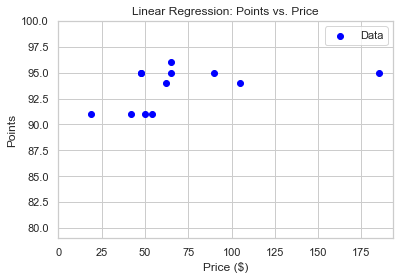

In [99]:


def origine(path,country,province):
    path='data.csv'

    print('debug')
    df = pd.read_csv(path)

    print(df.keys())

    # Extract X (price) and y (points)
    x = df['price'].values
    y = df['points'].values
    countries = df['country'].values
    provinces = df['province'].values

    indice_1=countries==country
    indice_2=provinces==province


    # Remove any rows where price is NaN 
    valid_indices = ~np.isnan(x) & ~np.isnan(y) & indice_1 & indice_2
    x = x[valid_indices]
    y = y[valid_indices]
    countries = countries[valid_indices]
    provinces = provinces[valid_indices]

    return x, y, countries, provinces

x, y, countries, provinces = origine('data.csv','US','Oregon')



'''
log_x = np.log(x)
coefficients = np.polyfit(log_x, y, 1) # returns [b, a]

b = coefficients[0]
a = coefficients[1]

y_fit = a + b * np.log(x)

#%%

'''

# Plot the data and regression line
plt.scatter(x, y, color='blue', label='Data')
plt.xlabel('Price ($)')
plt.ylabel('Points')
plt.title('Linear Regression: Points vs. Price')
plt.xlim(left=0)   # set x-axis minimum to 0
plt.ylim(bottom=79) # set y-axis minimum to 0
plt.ylim(top=100)  # set y-axis maximum to 100
plt.legend()
plt.show()




# %%


### Modélisation 2 : Classification bon ou mauvais vin 

In [100]:
#code ia, à interpréter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- Étape 1 : Création de la cible (Target) ---
# On crée une colonne où 1 = Excellent, 0 = Standard
fichier['is_excellent'] = (fichier['points'] >= 90).astype(int)

# --- Étape 2 : Préparation des variables ---
# X = Les données d'entrée (Ici on utilise juste le prix pour commencer)
# y = La réponse attendue (0 ou 1)
X = fichier[['price']]
y = fichier['is_excellent']

# --- Étape 3 : Séparation Train / Test ---
# On garde 20% des données cachées pour tester le modèle à la fin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Étape 4 : Entraînement du modèle ---
# On utilise la Régression Logistique (classique pour du binaire)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# --- Étape 5 : Évaluation ---
# On demande au modèle de prédire sur les données cachées
y_pred = clf.predict(X_test)

# Affichage de la Matrice de Confusion
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predit (0 = Standard, 1 = Excellent)')
plt.ylabel('Réel')
plt.title('Matrice de Confusion : Prédiction de la qualité par le prix')
plt.show()

# Rapport détaillé (Précision, Rappel...)
print(classification_report(y_test, y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').